# Week Class 2


## Get Data

In [1]:
!pip install google_play_scraper

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
!pip install google_play_scraper

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [14]:
result = reviews_all(
        'com.openai.chatgpt',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [15]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-01-01']

In [16]:
filtered_df

,at,content,score,userName
0,2023-07-28 16:01:17,Mohon tambahkan dan samakan fitur seperti di w...,5,Ya Udah
1,2023-09-05 20:08:31,KEREEEEEN LOVE YOU SO MUCH. sebagai orang yg s...,5,Nurul Hikmah
2,2023-07-28 04:33:06,Aplikasi ChatGPT sangat mengagumkan! Kemampuan...,5,Farhan Febriyanto
3,2023-08-11 19:32:24,Sangat berguna dan bermanfaat Sudah saya coba ...,5,Riantomen Bocel
4,2023-07-28 07:37:46,Aplikasi CHATGPT adalah aplikasi chatbot AI ya...,5,RIYAN
...,...,...,...,...
981,2023-08-23 14:44:18,kereeen,5,Muhammad Rizky
982,2023-09-03 21:11:43,Mantap,5,Agus Gunawan
983,2023-07-28 09:31:02,Ngeleg,1,Xiao Harto
984,2023-07-28 12:19:32,😍😍😍😍,5,Leonard Sandy


In [17]:
filtered_df.to_csv('data_gpt.csv', index=False)

## Text PreProcessing

In [18]:
!pip install nltk
!pip install sastrawi


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [19]:
filtered_df2 = filtered_df
filtered_df2

,at,content,score,userName
0,2023-07-28 16:01:17,Mohon tambahkan dan samakan fitur seperti di w...,5,Ya Udah
1,2023-09-05 20:08:31,KEREEEEEN LOVE YOU SO MUCH. sebagai orang yg s...,5,Nurul Hikmah
2,2023-07-28 04:33:06,Aplikasi ChatGPT sangat mengagumkan! Kemampuan...,5,Farhan Febriyanto
3,2023-08-11 19:32:24,Sangat berguna dan bermanfaat Sudah saya coba ...,5,Riantomen Bocel
4,2023-07-28 07:37:46,Aplikasi CHATGPT adalah aplikasi chatbot AI ya...,5,RIYAN
...,...,...,...,...
981,2023-08-23 14:44:18,kereeen,5,Muhammad Rizky
982,2023-09-03 21:11:43,Mantap,5,Agus Gunawan
983,2023-07-28 09:31:02,Ngeleg,1,Xiao Harto
984,2023-07-28 12:19:32,😍😍😍😍,5,Leonard Sandy


### Case with python with orbit data


In [20]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
100%|██████████████████████████████████████████████████████████████████████████████| 986/986 [00:00<00:00, 3507.49it/s]


In [22]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   --------------------- ------------------ 81.9/151.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


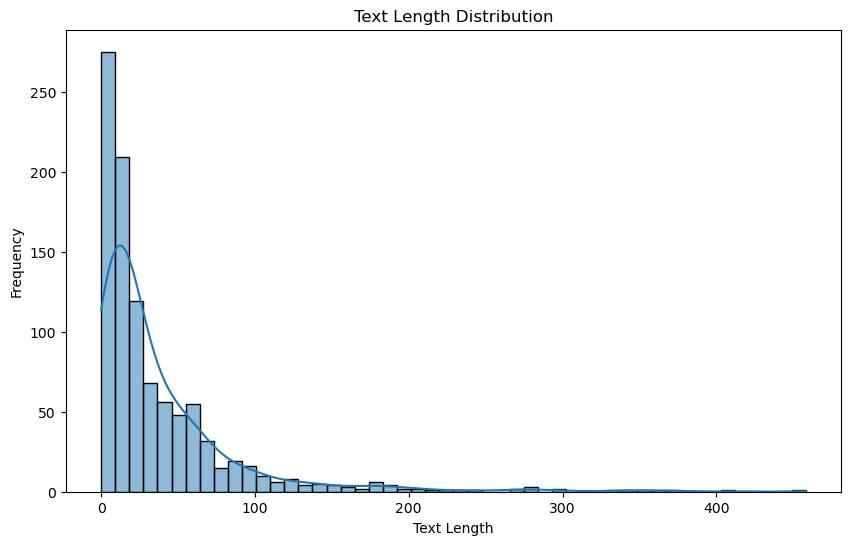

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df2, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

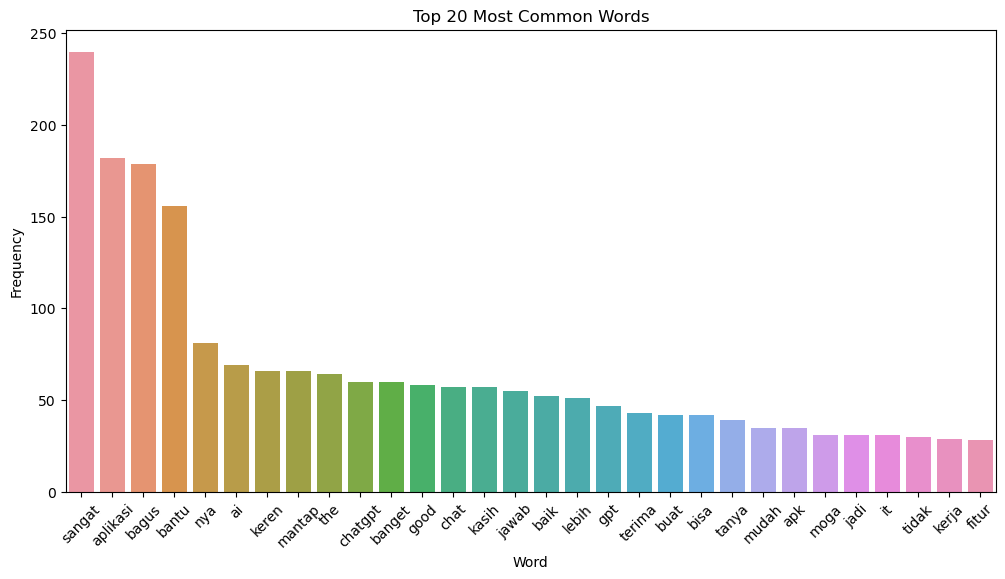

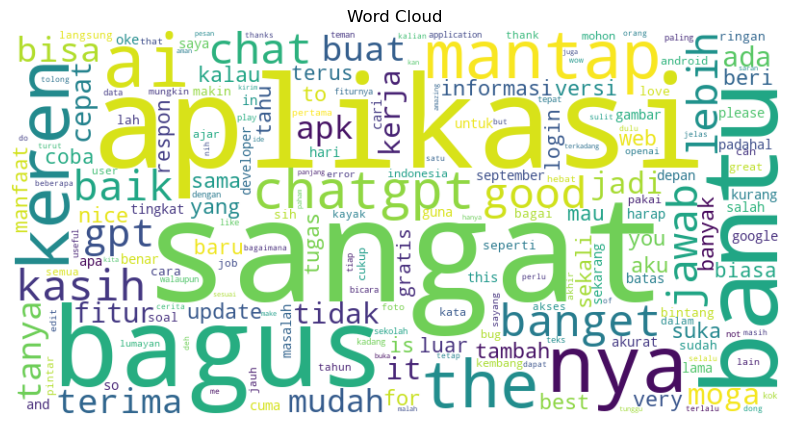

In [24]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df2['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [25]:
filtered_df2

,at,content,score,userName,contentp,contentp_clean,text_length
0,2023-07-28 16:01:17,Mohon tambahkan dan samakan fitur seperti di w...,5,Ya Udah,mohon tambahkan dan samakan fitur seperti di w...,mohon tambah sama fitur web kayak fitur edit p...,280
1,2023-09-05 20:08:31,KEREEEEEN LOVE YOU SO MUCH. sebagai orang yg s...,5,Nurul Hikmah,kereeeeen love you so much sebagai orang yg su...,kereeeeen love you so much bagai orang suka ba...,176
2,2023-07-28 04:33:06,Aplikasi ChatGPT sangat mengagumkan! Kemampuan...,5,Farhan Febriyanto,aplikasi chatgpt sangat mengagumkan kemampuan ...,aplikasi chatgpt sangat kagum mampu ai nya pah...,300
3,2023-08-11 19:32:24,Sangat berguna dan bermanfaat Sudah saya coba ...,5,Riantomen Bocel,sangat berguna dan bermanfaat sudah saya coba ...,sangat manfaat saya coba kerja mesti moga guna...,189
4,2023-07-28 07:37:46,Aplikasi CHATGPT adalah aplikasi chatbot AI ya...,5,RIYAN,aplikasi chatgpt adalah aplikasi chatbot ai ya...,aplikasi chatgpt aplikasi chatbot ai interakti...,178
...,...,...,...,...,...,...,...
981,2023-08-23 14:44:18,kereeen,5,Muhammad Rizky,kereeen,kereeen,7
982,2023-09-03 21:11:43,Mantap,5,Agus Gunawan,mantap,mantap,6
983,2023-07-28 09:31:02,Ngeleg,1,Xiao Harto,ngeleg,lag,3
984,2023-07-28 12:19:32,😍😍😍😍,5,Leonard Sandy,,,0


In [26]:
filtered_df2.to_csv('gpt_review.csv', index = False)